In [29]:
from typing_extensions import TypedDict,List
from langgraph.graph import StateGraph

In [30]:
class AgentState(TypedDict):
    name: str
    values: List[int]
    operation: str
    result: str

In [31]:
import math
def execute_node(state:AgentState) -> AgentState:
    """This node accepts the list of int and operation either * and + and gives back the output"""
    nums = state['values']
    ans = None
    if state['operation'] == '*':
        ans = math.prod(nums)
    else:
        ans = sum(nums) 
    state['result'] = f"Hi {state['name']}, your ans is {ans}"
    print(state)
    return state

In [32]:
graph_builder = StateGraph(AgentState)
graph_builder.add_node("executor",execute_node)

graph_builder.set_entry_point("executor")
graph_builder.set_finish_point("executor")

app = graph_builder.compile()

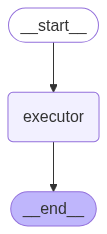

In [33]:
from IPython.display import Image,display

display(Image(app.get_graph().draw_mermaid_png()))

In [35]:
result = app.invoke({'name': 'aman', 'values': [1,2,3,4,5], 'operation': "+"})

{'name': 'aman', 'values': [1, 2, 3, 4, 5], 'operation': '+', 'result': 'Hi aman, your ans is 15'}
